# Logistic regression with stochastic solvers

In this notebook we wish to solve the logistic regression problem of the form:

$$J = - \frac{1}{n} \sum_i  log(1 + e^{-y^i z^i})
$$

where $z^i = x^{iT} \theta$, and compare different optimization algorithms, namely:

- SGD
- SAG
- SAGA

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
 
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from scipy.special import expit
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import load_svmlight_file
from stochmdd.stochmdd_numpy import SGD, SAG
from scipy.special import expit
from scipy.optimize import minimize
from logreg import *
np.random.seed(42)

## Half moon

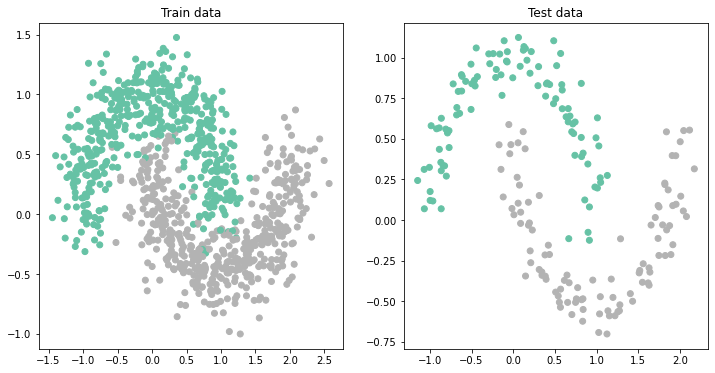

In [2]:
train_size = 1000 # Size of training data
test_size = 200 # Size of test data

X_train, y_train, X_test, y_test = make_train_test(train_size, test_size, noise=0.2)
y_train, y_test = y_train.ravel(), y_test.ravel()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Set2');
ax[1].set_title('Test data');

In [3]:
epochs = 1000
pars = np.random.normal(0,1,2)
y_train[y_train==0] = -1
y_test[y_test==0] = -1

logreg = LogReg1(X_train, y_train)
optimizer = SGD(pars, 1)

for epoch in np.arange(epochs):
    # Compute gradient
    dpars = logreg.grad(pars)
    
    # Update model
    optimizer.step(dpars)

print(pars)

[ 1.48001372 -4.32250784]


(0.864, 0.865)

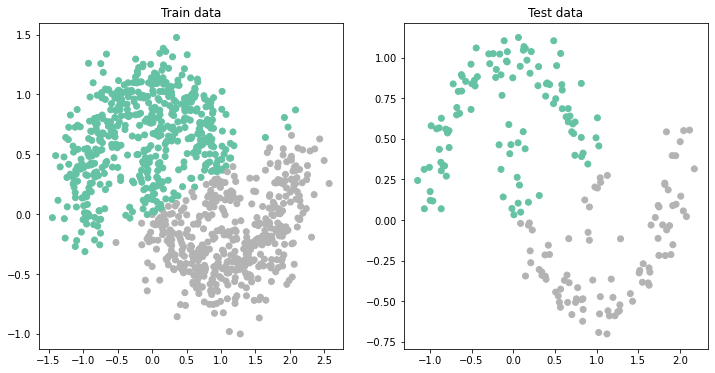

In [4]:
ypredtrain = logreg.fun(pars)[0]
ypredtest = logreg.fun(pars, X=X_test, y=y_test)[0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=np.where(ypredtrain>0, 1, 0), cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=np.where(ypredtest>0, 1, 0), cmap='Set2')
ax[1].set_title('Test data');

accuracy_score(y_train, ypredtrain), accuracy_score(y_test, ypredtest)

## Data Orsay

In [5]:
mat_contents = sio.loadmat("data_orsay_2017.mat")

X = mat_contents["Xtrain"]
y = mat_contents["ytrain"].flatten()

Xtest = mat_contents["Xtest"]
ytest = mat_contents["ytest"].flatten()

nx, nfeat = X.shape

In [6]:
datapasses = 50  # number of sweeps through all the data. This means that there will datapasses*n stochastic gradient updates
iters = int(datapasses * nx)

# define parameters
#pars0 = np.random.normal(0,1,nfeat)
pars0 = np.zeros(nfeat)
nobias = True

if nobias:
    pars0[-1] = 0 

Iter0, Loss: 0.6932140313842019
Iter10000, Loss: 0.6129650798256967
Iter20000, Loss: 0.5871663691274829
Iter30000, Loss: 0.5700491452454405
Iter40000, Loss: 0.5581919793079021
Iter50000, Loss: 0.5491925326016242
Iter60000, Loss: 0.541806519513245
Iter70000, Loss: 0.535132320710373
Iter80000, Loss: 0.5301529270670207
Iter90000, Loss: 0.5252685588714491
Iter100000, Loss: 0.5213604679769228
Iter110000, Loss: 0.5176611235319578
Iter120000, Loss: 0.5142701564658042
Iter130000, Loss: 0.5112845281066806
Iter140000, Loss: 0.508407670187072
Iter150000, Loss: 0.5058447082133797
Iter160000, Loss: 0.5036758327730182
Iter170000, Loss: 0.5017150268831104
Iter180000, Loss: 0.4995818173301879
Iter190000, Loss: 0.4978677327852177
Iter200000, Loss: 0.49615713261987504
Iter210000, Loss: 0.4946171977622487
Iter220000, Loss: 0.49305480759669673
Iter230000, Loss: 0.49153630467452486
Iter240000, Loss: 0.49027619838181324
Iter250000, Loss: 0.4890791237352343
Iter260000, Loss: 0.48792413069080315
Iter270000, L

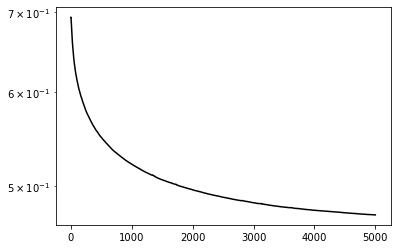

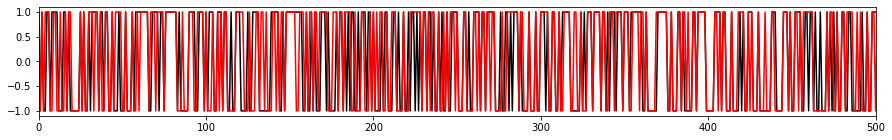

In [7]:
# SGD
batchsize = 1

# Find optimal lr
lr = 1e-3

pars = pars0.copy()
fun_sgd, acc_sgd = log_reg_sgd(X, y, iters, lr, batchsize, pars, logfun=LogReg1, thresh=0.,
                               nobias=nobias, weight_decay=1./nx, hist_step=100)

Iter0, Loss: 0.6931471868770457
Iter10000, Loss: 0.644370986384045
Iter20000, Loss: 0.6044077444866802
Iter30000, Loss: 0.5802734136029815
Iter40000, Loss: 0.5650611206943761
Iter50000, Loss: 0.553597920743893
Iter60000, Loss: 0.5445866285834569
Iter70000, Loss: 0.537375688262369
Iter80000, Loss: 0.5313383855381653
Iter90000, Loss: 0.5262079387210612
Iter100000, Loss: 0.5217436548517153
Iter110000, Loss: 0.5178032713458487
Iter120000, Loss: 0.5142880686878176
Iter130000, Loss: 0.5111187467682162
Iter140000, Loss: 0.5082429025069359
Iter150000, Loss: 0.5056193287258536
Iter160000, Loss: 0.5032120370474928
Iter170000, Loss: 0.5009967433691419
Iter180000, Loss: 0.49895066833698976
Iter190000, Loss: 0.4970544623145541
Iter200000, Loss: 0.4952919207103838
Iter210000, Loss: 0.49365016847937115
Iter220000, Loss: 0.49211835756096134
Iter230000, Loss: 0.49068430527606954
Iter240000, Loss: 0.4893406190936013
Iter250000, Loss: 0.48807850489703014
Iter260000, Loss: 0.4868922669343014
Iter270000, L

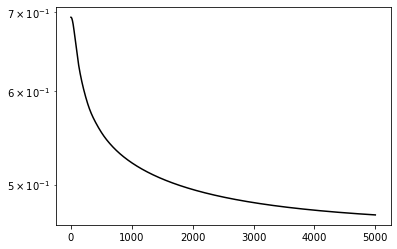

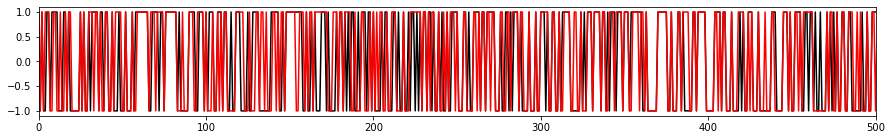

In [8]:
# SAG
batchsize = 1

# Find optimal lr
lr = 1e-3

pars = pars0.copy()
fun_sag, acc_sag = log_reg_sag(X, y, iters, lr, batchsize, pars, logfun=LogReg1, thresh=0.,
                               nobias=True, adjusted=False, saga=False, weight_decay=0., 
                               hist_step=100, print_step=10000)

Iter0, Loss: 0.6932104221439791
Iter10000, Loss: 0.6138308949255425
Iter20000, Loss: 0.5858924923638462
Iter30000, Loss: 0.5695692115639903
Iter40000, Loss: 0.5577684504087266
Iter50000, Loss: 0.5485938119656439
Iter60000, Loss: 0.5410358428462344
Iter70000, Loss: 0.5346949006161892
Iter80000, Loss: 0.5292693403581245
Iter90000, Loss: 0.5245507645612107
Iter100000, Loss: 0.5203877580368013
Iter110000, Loss: 0.516674499142852
Iter120000, Loss: 0.5133412537239956
Iter130000, Loss: 0.5103163845280542
Iter140000, Loss: 0.5075643568869697
Iter150000, Loss: 0.50504412409075
Iter160000, Loss: 0.5027269811887475
Iter170000, Loss: 0.5005909080457819
Iter180000, Loss: 0.49861237341651593
Iter190000, Loss: 0.49677655240913443
Iter200000, Loss: 0.4950668743975655
Iter210000, Loss: 0.49347218537243864
Iter220000, Loss: 0.49198046409595736
Iter230000, Loss: 0.4905820570009985
Iter240000, Loss: 0.4892694084904265
Iter250000, Loss: 0.48803559163411475
Iter260000, Loss: 0.48687488251646954
Iter270000, 

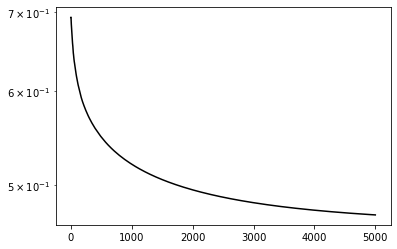

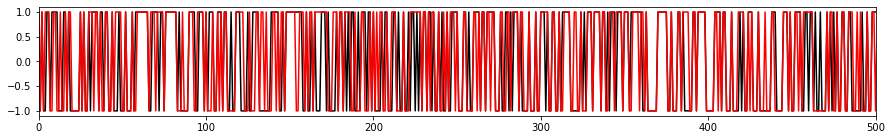

In [9]:
# SAGA
batchsize = 1

# Find optimal lr
lr = 1e-3 

pars = pars0.copy()
fun_saga, acc_saga = log_reg_sag(X, y, iters, lr, batchsize, pars, logfun=LogReg1, thresh=0.,
                                 nobias=True, adjusted=False, saga=True, weight_decay=0., 
                                 hist_step=100, print_step=10000)

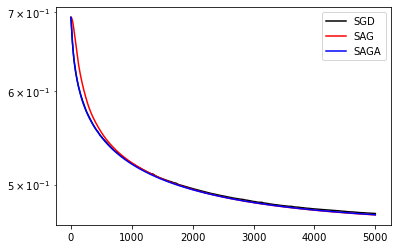

In [10]:
plt.figure()
plt.semilogy(fun_sgd, 'k', label='SGD')
plt.semilogy(fun_sag, 'r', label='SAG')
plt.semilogy(fun_saga, 'b', label='SAGA')
plt.legend();

## RCV1

In [11]:
d = load_svmlight_file('rcv1_train.binary')

# create data
X = np.array(d[0].todense()) # (20242 data points, 47236 features)
X = X[:20224] # to be multiple of 64
y = d[1][:20224]

nx, nfeat = X.shape

In [12]:
# define parameters
pars0 = np.random.normal(0,1,nfeat+1)
#pars0 = np.zeros(nfeat+1)
nobias = False

if nobias:
    pars0[-1] = 0 

#### One sample

In [13]:
datapasses = 50  # number of sweeps through all the data. This means that there will datapasses*n stochastic gradient updates
iters = int(datapasses * nx)

In [14]:
# SGD
batchsize = 1

# Find optimal lr
lr = 1e-5
  
pars = pars0.copy()
fun_sgd, acc_sgd = log_reg_sgd(X, y, iters, lr, batchsize, pars, 
                               nobias=nobias, weight_decay=0., hist_step=100, print_step=1000)

Iter0, Loss: 0.7911046874276066
Iter10000, Loss: 0.8227299995445683
Iter20000, Loss: 0.8735719372625994
Iter30000, Loss: 0.926755519828572
Iter40000, Loss: 0.9878958452932942
Iter50000, Loss: 1.0428426850146608
Iter60000, Loss: 1.0990590620334904


KeyboardInterrupt: 